<a href="https://colab.research.google.com/github/chclau/MIF_Gen/blob/master/gen_canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Init canvas
num_img  = 5000;
num_tst  = np.int16(num_img/10);
img_cols = 180;
img_rows = 100;
tot_img  = num_img+num_tst;
canvas  = np.zeros((tot_img, img_rows, img_cols));
canvas_lbl = np.zeros((tot_img));
canvas_coord_row = np.zeros((tot_img, img_rows*img_cols));
canvas_coord_col = np.zeros((tot_img, img_rows*img_cols));
canvas_coord_cnt = np.zeros((tot_img));

In [0]:
# Generate pictures

line_rows   = img_rows/30
offset_rows = img_rows/30
line_cols   = img_cols/40
offset_cols = img_cols/40

for k in range(num_img+num_tst):

  # Top horiz. line
  line1_rows = np.int16(line_rows * (1 + np.random.random_sample()/5) )
  line1_irow = np.int16(offset_rows * (1 + np.random.random_sample()/5) )
  line1_icol = np.int16(offset_cols * (1 + np.random.random_sample()/5) ) 
  line1_cols = np.int16(img_cols - line_cols * (1 + np.random.random_sample()/5) - 2 * offset_cols) 

  for i in range(line1_rows):
    for j in range (line1_cols):
      canvas[k, line1_irow+i, line1_icol+j] = 1;
      
  # Top rectangle
  line_sq_rows = np.int16(line_rows * 4 * (1 + np.random.random_sample()/6) )
  line_sq_cols = np.int16(line_cols * 6 * (1 + np.random.random_sample()/8) )
  line_sq_icol = np.int16((line1_cols-line_sq_cols)/2) + line1_icol
  line_sq_irow = np.int16(line1_irow + line_rows - 1);

  for i in range(line_sq_rows):
    for j in range (line_sq_cols):
      canvas[k, line_sq_irow+i, line_sq_icol+j] = 1;

  # Bottom horiz. line
  line2_rows = np.int16(line_rows * (1 + np.random.random_sample()/5) )
  line2_irow = np.int16(img_rows - line_rows * (1 + np.random.random_sample()/5) - 2 * offset_rows)
  line2_icol = line1_icol
  line2_cols = line1_cols
  #print(line2_irow, line2_icol)

  for i in range(line2_rows):
    for j in range (line2_cols):
      canvas[k, line2_irow+i, line2_icol+j] = 1;

  # Left line
  line3_cols = np.int16(line_cols * (1 + np.random.random_sample()/5) )
  line3_rows = np.int16(img_rows * 1/2 + line_rows * np.random.random_sample() )
  line3_irow = line1_irow
  line3_icol = line1_icol

  for i in range(line3_rows):
    for j in range (line3_cols):
      canvas[k, line3_irow+i, line3_icol+j] = 1;

  # Right line
  line4_cols = np.int16(line_cols * (1 + np.random.random_sample()/5) )
  line4_rows = np.int16(img_rows * 1/2 + line_rows * np.random.random_sample() )
  line4_irow = line1_irow
  line4_icol = line2_icol+line2_cols-line4_cols

  for i in range(line4_rows):
    for j in range (line4_cols):
      canvas[k, line4_irow+i, line4_icol+j] = 1;  
      
  # Left triangle
  ltr_rows = np.int16(img_rows * 1/5 + line_rows * np.random.random_sample() )
  ltr_irow = line3_irow + line3_rows - 1
  ltr_icol = line3_icol
  ltr_cols = ltr_icol + line3_cols
  
  for i in range(ltr_rows):
    j = ltr_icol
    while (j < ltr_cols):
      canvas[k, ltr_irow+i, j] = 1;
      j = j + 1;
    ltr_cols = ltr_cols + line_cols / 10
 
  # Rigth triangle
  rtr_rows = np.int16(img_rows * 1/5 + line_rows * np.random.random_sample() )
  rtr_irow = line4_irow + line4_rows - 1
  rtr_icol = line4_icol
  rtr_cols = rtr_icol + line4_cols 
  
  for i in range(rtr_rows):
    j = rtr_cols
    while (j > rtr_icol):
      canvas[k, ltr_irow+i, j] = 1;
      j = j - 1;
    rtr_icol = rtr_icol - line_cols / 10
  
  
  # Bottom left rectangle
  lsq_rows = np.int16(line_rows * 2.5 * (1 + np.random.random_sample()/5) )
  lsq_cols = np.int16(line_rows * 3.3 * (1 + np.random.random_sample()/5) )
  lsq_irow = line2_irow
  lsq_icol = line2_icol
  
  i = lsq_irow
  j = lsq_rows
  while (j > 0):
    for m in range (lsq_cols):
      canvas[k, i-j, lsq_icol + m] = 1;
    j = j-1;

  # Bottom right rectangle
  rsq_rows = np.int16(line_rows * 1.8 * (1 + np.random.random_sample()/5) )
  rsq_cols = np.int16(line_rows * 4.2 * (1 + np.random.random_sample()/5) )
  rsq_irow = line2_irow
  rsq_icol = line2_icol+line2_cols-rsq_cols
  
  i = rsq_irow
  j = rsq_rows
  while (j > 0):
    for m in range (rsq_cols):
      canvas[k, i-j, rsq_icol + m] = 1;
    j = j-1;
     
  # Add faults
  decision = np.random.random_sample()
  if decision < 0.1:
    
    # Add excess rectangle
    found = 0;
    canvas_lbl[k] = 1;
    while (found == 0):
      row = np.int16(img_rows * np.random.random_sample())
      col = np.int16(img_cols * np.random.random_sample())
      
      if (canvas[k, row, col] == 1):
        found = 1
        row = row - 2
        col = col - 4
        #print (k, row, col)
        fault_rows = np.int16(line_rows * 2.2 * (1 + np.random.random_sample()/5) )
        fault_cols = np.int16(line_cols * 2.2 * (1 + np.random.random_sample()/5) )
        for i in range(fault_rows):
          for j in range (fault_cols):
            if ((row+i) < img_rows) and ((col+j) < img_cols):
              canvas[k, row+i, col+j] = 1;
  elif decision < 0.2:
    
    # Add defect rectangle
    found = 0;
    canvas_lbl[k] = 2;
    while (found == 0):
      row = np.int16(img_rows * np.random.random_sample())
      col = np.int16(img_cols * np.random.random_sample())
      
      if (canvas[k, row, col] == 1):
        found = 1
        #print (k, row, col)
        row = row - 2
        col = col - 4
        fault_rows = np.int16(line_rows * 2.2 * (1 + np.random.random_sample()/5) )
        fault_cols = np.int16(line_cols * 2.2 * (1 + np.random.random_sample()/5) )
        for i in range(fault_rows):
          for j in range (fault_cols):
            if ((row+i) < img_rows) and ((col+j) < img_cols):
              canvas[k, row+i, col+j] = 0;
  else:
    canvas_lbl[k] = 0;
  
      


In [0]:
# Model
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_rows, img_cols, 1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(32, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(3,  activation='softmax'))
network.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
print(canvas_lbl[5010:5040])

[0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 2. 0. 0.]


In [94]:
# Fit
from keras.utils import to_categorical
canvas_images = canvas[:num_img].reshape((num_img, img_rows, img_cols, 1))
categ_labels = to_categorical(canvas_lbl[:num_img])
canvas_tst   = canvas[-num_tst:].reshape((num_tst, img_rows, img_cols, 1))
lbl_tst = to_categorical(canvas_lbl[-num_tst:])
history = network.fit(canvas_images, categ_labels, epochs=8, batch_size=32, validation_data=(canvas_tst, lbl_tst))


Train on 5000 samples, validate on 500 samples
Epoch 1/8
5000/5000 [==============================] - 116s 23ms/step - loss: 0.0923 - acc: 0.9770 - val_loss: 0.1154 - val_acc: 0.9700
Epoch 2/8
5000/5000 [==============================] - 117s 23ms/step - loss: 0.0848 - acc: 0.9780 - val_loss: 0.1033 - val_acc: 0.9740
Epoch 3/8
5000/5000 [==============================] - 117s 23ms/step - loss: 0.0789 - acc: 0.9808 - val_loss: 0.0993 - val_acc: 0.9740
Epoch 4/8
5000/5000 [==============================] - 117s 23ms/step - loss: 0.0947 - acc: 0.9782 - val_loss: 0.1005 - val_acc: 0.9760
Epoch 5/8
5000/5000 [==============================] - 116s 23ms/step - loss: 0.0766 - acc: 0.9810 - val_loss: 0.1856 - val_acc: 0.9840
Epoch 6/8
5000/5000 [==============================] - 116s 23ms/step - loss: 0.0724 - acc: 0.9822 - val_loss: 0.1140 - val_acc: 0.9740
Epoch 7/8
5000/5000 [==============================] - 116s 23ms/step - loss: 0.0655 - acc: 0.9840 - val_loss: 0.0863 - val_acc: 0.9800
E

In [103]:
network.predict(canvas[5011].reshape((1, img_rows, img_cols, 1)))

array([[1.358606e-04, 9.998435e-01, 2.059558e-05]], dtype=float32)

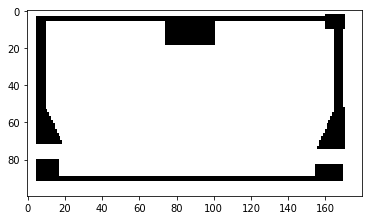

In [102]:
plt.imshow(canvas[5011], cmap=plt.cm.binary)

In [0]:
print(canvas_lbl[num_img+200:num_img+220])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
